In [20]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec 

In [7]:
data = pd.read_csv("C:/Users/Lautaro/Desktop/testt/fakejob.csv");
data.head();

### Diccionario de datos ;)

| Variable            | Descripcion                                                   | Es utilizada | Entrada/Salida |
|---------------------|---------------------------------------------------------------|--------------|----------------|
| job_id              | Id único del anuncio.                                         | NO           | -              |
| title               | Título del anuncio                                            | NO           | -              |
| location            | Ubicación geografica del anuncio                              | NO           | -              |
| department          | Departamento de la empresa                                    | SI           | Entrada        |
| salary_range        | Rango de salario ofrecido del anuncio                         | NO           | -              |
| company_profile     | Descripcion de la empresa                                     | SI           | Entrada        |
| description         | Descripción detallada del anuncio                             | SI           | Entrada        |
| requirements        | Requisitos necesarios                                         | SI           | Entrada        |
| benefits            | Beneficios ofrecidos por el empleador                         | SI           | Entrada        |
| telecommuting       | Posibilidad Homeoffice                 (0/1)                  | SI           | Entrada        |
| has_company_logo    | Anuncio contiene logo de la empresa    (0/1)                  | SI           | Entrada        |
| has_questions       | Se requiere evaluación previa          (0/1)                  | SI           | Entrada        |
| employment_type     | Tipo de empleo           (Full-Time / Part-Time / Contract)   | SI           | Entrada        |
| required_experience | Experiencia requerida                                         | SI           | Entrada        |
| required_education  | Nivel de educación requerida                                  | SI           | Entrada        |
| industry            | Tipo de rubro de la empresa                                   | NO           | -              |
| function            | Ámbito de trabajo                                             | NO           | -              |
| fraudulent          | Veracidad del anuncio                  (0/1)                  | SI           | Salida         |

### Notas sobre las variables:

- **departament: Área funcional de la empresa. Ejemplo: Ventas, compras, sistemas, etc. ** 
- **company_profile: Breve descripción de la empresa. ** 
- **industry: Rubro referido a la empresa en cuestión. Ejemplo: Informatica, bienes inmuebles, etc. **
- **function: Funcion a desarrollar dentro de la empresa. Ejemplo: Consultoria, Administración, Soporte, etc. ** 


### Variable de salida:

 - Nuestra variable de salida /target va a ser **fraudulent**.
 - Sus posibles valores de salida serán, 0 = Verdadero , 1 = Falso.

### Analisis de valores null

In [8]:
data.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [9]:
data.nunique()

job_id                 17880
title                  11231
location                3105
department              1337
salary_range             874
company_profile         1709
description            14801
requirements           11968
benefits                6205
telecommuting              2
has_company_logo           2
has_questions              2
employment_type            5
required_experience        7
required_education        13
industry                 131
function                  37
fraudulent                 2
dtype: int64

## Variables no utilizadas
- **salary_range:** De acuerdo a lo observado en el análisis anterior podemos decir que esta variable no será tenida en cuenta, debido a la cantidad de valores nulos que contiene.
- **job_id:** Se trata de una variable que se utiliza para enumerar cada uno de los artículos, consideramos que no brinda información útil para realizar la predicción.
- **department:** En este caso, no lo tendremos en cuenta debido a la gran variedad de departamentos que pueden existir. No consideramos que brinde información útil con respecto al problema.
- **location:** Creemos que la localización no es útil para la predicción. Se desea determinar si un articulo es verdadero o falso sin importar la ubicación de la publicación. 
- **title:** De acuerdo a lo observado, hay una gran variedad de titulos en relación a la cantidad de registros. Consideramos que no brinda información útil para sacar estadisticas a partir del mismo. 
- **industry:** Decidimos no tener en cuenta esta variable debido a la gran cantidad de variedad que podría existir. 
- **function:** Consideramos que esta variable no debe ser tenida en cuenta por el mismo motivo que la variable industria y título, ya que pueden existir una gran cantidad de valores en relación a los registros.  




In [63]:
prueba = data
datos = prueba.drop(['job_id', 'title', 'location', 'department', 'industry', 'function','salary_range'], axis=1)

datos

,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,fraudulent
0,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,0
1,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,0
2,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,0
3,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,0
4,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,0
...,...,...,...,...,...,...,...,...,...,...,...
17875,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,0
17876,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,0
17877,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,0
17878,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,0


In [11]:
datos.isnull().sum()

salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
fraudulent                 0
dtype: int64

#### Anuncios con departamentos nulos que son falsos

In [12]:
departaments = data[data.department.isnull()]
falsas = departaments[departaments.fraudulent == 1]
falsas.count()

job_id                 531
title                  531
location               514
department               0
salary_range           105
company_profile         96
description            530
requirements           402
benefits               266
telecommuting          531
has_company_logo       531
has_questions          531
employment_type        375
required_experience    212
required_education     192
industry               337
function               274
fraudulent             531
dtype: int64

#### Anuncios con departamentos nulos que son verdaderos


In [13]:
departaments = data[data.department.isnull()]
verdaderas = departaments[departaments.fraudulent == 0]
verdaderas.count()

job_id                 11016
title                  11016
location               10738
department                 0
salary_range            1478
company_profile         9098
description            11016
requirements            9067
benefits                5986
telecommuting          11016
has_company_logo       11016
has_questions          11016
employment_type         8969
required_experience     6328
required_education      5953
industry                7939
function                6370
fraudulent             11016
dtype: int64

In [14]:
data['telecommuting'].describe()

count    17880.000000
mean         0.042897
std          0.202631
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: telecommuting, dtype: float64

### Ver Salady_range

### Variables de entrada

#### En las siguientes columnas reemplazamos los valores 'NaN' por 'Sin datos'

In [16]:
categorias_columnas = ['employment_type', 'required_experience', 'required_education']
for col in categorias_columnas:
    datos[col].fillna("Sin datos", inplace=True)

#### En las siguientes columnas reemplazamos los valores 'NaN' por '  '

In [19]:
txt_columnas = ['company_profile', 'description', 'requirements', 'benefits']

datos = datos.dropna(subset=txt_columnas, how='all')

for col in txt_columnas:
    datos[col].fillna(' ', inplace=True)

TypeError: set_xlabel() missing 1 required positional argument: 'xlabel'

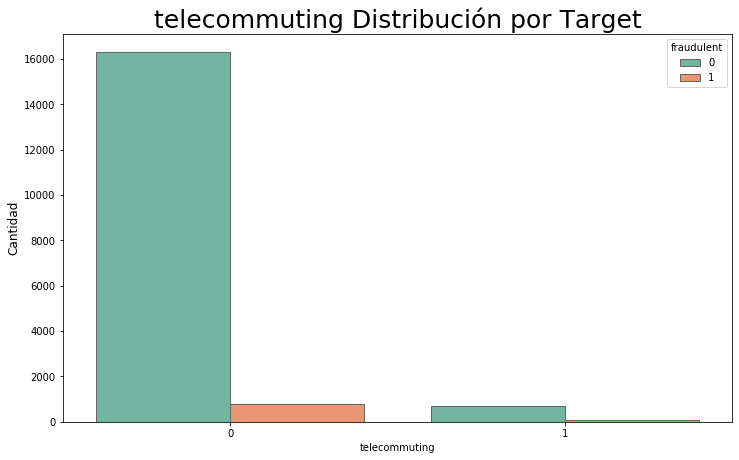

In [124]:
categorias_col = ['telecommuting', 'has_company_logo', 'has_questions', 'employment_type', 'required_experience', 'required_education']

tabla = gridspec.GridSpec(5, 2, wspace=0.5, hspace=0.5) 
plt.figure(figsize=(30,50)) 

for n, col in enumerate(datos[categorias_col]):
    ax = plt.subplot(tabla[n])
    sns.countplot(x=col,edgecolor=".4", data=datos, hue='fraudulent', palette='Set2', order=datos[col].value_counts().iloc[:5].index)    
    ax.set_ylabel('Cantidad', fontsize=12) 
    
    ax.set_title(f'{col} Distribución por Target', fontsize=25) 
    xlabels = ax.get_xticklabels() 
    
    ax.set_xticklabels(xlabels,  fontsize=10 )
    plt.legend(fontsize=10)
    ax.set_facecolor('white')
    cantidad_total = len(datos)
    sizes=[] 
    for p in ax.patches: 
        height = p.get_height()
        sizes.append(height)
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/cantidad_total*100), 
                ha="center", fontsize=10) 
  
plt.show()